# Projet Text Mining

## Apport de données


les données quand a importé sont separés par des tabulation

In [1]:
import pandas as pd 

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("/home/toutou/nyt.csv/nyt.csv",sep='\t') 
# Preview the first 5 lines of the loaded data 
data.head()


,dates,texts,titles,principal_classifier,second_classifier,third_classifier,week
0,1987-01-01,"LEAD: Governor Cuomo, with a possible Preside...",STATE'S LEADERS ARE SWORN IN ON EVE OF '87,politics and government,LIEUTENANT GOVERNORS (US),GOVERNORS (US),1987001
1,1987-01-02,LEAD: Fifty-eight days after winning re-elect...,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS,politics and government,INAUGURATIONS,GOVERNORS (US),1987001
2,1987-01-02,LEAD: Coming the day after Governor Cuomo ann...,ALBANY PAGEANT: POMP AND POLITICS,politics and government,INAUGURATIONS,Top/News/U.S./U.S. States,1987001
3,1987-01-02,"LEAD: For the first time in two years, New Yo...",LUNDINE OPTIMISTIC ABOUT NEW ROLE,politics and government,LIEUTENANT GOVERNORS (US),INAUGURATIONS,1987001
4,1987-01-02,LEAD: To the Editor: LEAD: To the Editor: To ...,Let's Scrap That Indefensible Board of Estimate,politics and government,Letter,Top/Opinion/Opinion/Letters,1987001


In [333]:
data.describe

<bound method NDFrame.describe of            dates                                              texts  \
0     1987-01-01   LEAD: Governor Cuomo, with a possible Preside...   
1     1987-01-02   LEAD: Fifty-eight days after winning re-elect...   
2     1987-01-02   LEAD: Coming the day after Governor Cuomo ann...   
3     1987-01-02   LEAD: For the first time in two years, New Yo...   
4     1987-01-02   LEAD: To the Editor: LEAD: To the Editor: To ...   
5     1987-01-02   LEAD: Officially, New York State Senators and...   
6     1987-01-02   LEAD: A six-day session of Vietnam's National...   
7     1987-01-02   LEAD: Following is a transcript of Governor C...   
8     1987-01-02   LEAD: West German television executives were ...   
9     1987-01-03   LEAD: The increasing harshness of official cr...   
10    1987-01-04   LEAD: DURING one of his periodic radio call-i...   
11    1987-01-04   LEAD: ONE year ago this Friday, Donald R. Man...   
12    1987-01-04   LEAD: AS Governor Cuomo 

In [13]:
data.texts[0]


" LEAD: Governor Cuomo, with a possible Presidential campaign waiting in the wings, took the oath of office New Year's Eve for a second term as New York's chief executive. LEAD: Governor Cuomo, with a possible Presidential campaign waiting in the wings, took the oath of office New Year's Eve for a second term as New York's chief executive. Governor Cuomo, with a possible Presidential campaign waiting in the wings, took the oath of office New Year's Eve for a second term as New York's chief executive. The official oath was administered to Mr. Cuomo by Sol Wachtler, Chief Judge of New York State, during a private ceremony tonight at the Governor's Mansion. ''What we have to do now is spend four more years trying to provide other people in this state with the kind of magnificent opportunities that we've had,'' Mr. Cuomo told a small group of friends and relatives after taking his oath. ''We worked very hard the last four years, we'll work even harder in the four years ahead.'' Before taki

## Exploration des differentes possiblités pour exploiter la librairy Spacy pour extraire les entités (Descripteur de Personnes des Lieux et des Evenements)

On commence par appliquer les differents traitements sur un seul fichier

In [2]:
import spacy
from collections import Counter
#from collections import Counter
#import en_core_web_sm
nlp = spacy.load('en')
article = nlp(data.texts[0])
#article = nlp(ny_bb)
#print(doc.text)
for token in article:
    print(token.text, token.pos_, token.dep_,token.ent_type_,token.tag_)



  SPACE   _SP
LEAD NOUN ROOT  NN
: PUNCT punct  :
Governor PROPN compound  NNP
Cuomo PROPN nsubj PERSON NNP
, PUNCT punct  ,
with ADP prep  IN
a DET det  DT
possible ADJ amod  JJ
Presidential ADJ amod  JJ
campaign NOUN pobj  NN
waiting VERB acl  VBG
in ADP prep  IN
the DET det  DT
wings NOUN pobj  NNS
, PUNCT punct  ,
took VERB ROOT  VBD
the DET det  DT
oath NOUN dobj  NN
, PUNCT punct  ,
Florida PROPN conj GPE NNP
, PUNCT punct  ,
Louisiana PROPN conj GPE NNP
and CCONJ cc  CC
North PROPN compound GPE NNP
Carolina PROPN conj GPE NNP
, PUNCT punct  ,
said VERB ROOT  VBD
a DET det  DT
spokesman NOUN nsubj  NN
, PUNCT punct  ,
Martin PROPN compound PERSON NNP
Steadman PROPN appos PERSON NNP
. PUNCT punct  .


In [15]:
(article.ents)


(Cuomo,
 New Year's Eve,
 second,
 New York's,
 Cuomo,
 New Year's Eve,
 second,
 New York's,
 Cuomo,
 New Year's Eve,
 second,
 New York's,
 Cuomo,
 Sol Wachtler,
 New York State,
 tonight,
 the Governor's Mansion,
 four more years,
 Cuomo,
 the last four years,
 the four years ahead,
 Martin Steadman)

In [3]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 2,
         'DATE': 6,
         'EVENT': 5,
         'FAC': 3,
         'GPE': 10,
         'NORP': 1,
         'ORDINAL': 4,
         'ORG': 1,
         'PERSON': 12,
         'PRODUCT': 1,
         'TIME': 2})

In [12]:
from spacy import displacy
sentences = [x for x in article.sents]
#sentences
displacy.render(nlp(str(sentences[1])), jupyter=True, style='dep')

In [8]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

## Detection Des Entités; les lieux "GPE", les personnes "PERSON" et les evenements "EVENT" sur un seul document

In [20]:

import numpy as np
places = [x for x in article.ents if x.label_=='GPE']
people = [x for x in article.ents if x.label_=='PERSON']
events= [x for x in article.ents if x.label_=='EVENT']
#list_loc = [token.i for token in article if token.ent_type_=='GPE' ]

used = []
for x in sorted(people):
    if str(x) not in used:
        used.append(str(x))
        
        
people=used
###################
used = []
for x in sorted(places):
    if str(x) not in used:
        used.append(str(x))
        
        
places=used
###################
used = []
for x in sorted(events):
    if str(x) not in used:
        used.append(str(x))
        
        
events=used

people,events,places

(['Cuomo', 'Sol Wachtler', 'Stan Lundine', 'Martin Steadman'],
 ["New Year's Eve", "New Year's Day"],
 ["New York's",
  'New York State',
  'Iowa',
  'California',
  'Florida',
  'Louisiana',
  'North Carolina'])

Now we redo the same process for every article then create a colomn for every meta data we're aiming to add places, events and people 

In [21]:
len(data)

7146

## Elimination des entités dupliquées ou similaires

In [22]:
p=[ 'Mai Chi Tho','Chi Mai Tho','Mai DO Tho','Mai Tho','Tho',"Hing Mai Do tho","Sara T","T Sara"]
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(p)
X_bag_of_words = vectorizer.transform(p)
X_bag_of_words.shape
vectorizer.get_feature_names()
D = X_bag_of_words.toarray()

import math

# fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
    num = np.dot(i, j)
    den = math.sqrt(sum(i*i))*math.sqrt(sum(j*j))
    if (den>0):    
        return (num/den)
    else:
        return 0

ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 
    
for i in range(len(D)):
    for j in range(len(D)):
        ones_array[i][j]=(cosinus(D[i, :], D[j, :]))
        
print(ones_array)
indexes=np.where(ones_array >0.4)
print(indexes)
repeated=[]
for i,j in zip(indexes[0],indexes[1]) :
    if (i!=j and len(p[i])>len(p[j])):
        repeated.append(p[j])
        #print(repeated)
        #p.pop(i)
        #print("+",p[i],"+",p[j],ones_array[i][j],"+++++",len(p[i]),"++",i,"++++++++",len(p[j]),"++",j)
        print("+",p[i],"+",p[j],"++similarité++ :",ones_array[i][j])

print("liste initiale",p)
print("element à eliminer",repeated)

[[1.         0.6        0.4        0.51639778 0.4472136  0.3380617
  0.         0.        ]
 [0.6        1.         0.4        0.77459667 0.4472136  0.3380617
  0.         0.        ]
 [0.4        0.4        1.         0.51639778 0.4472136  0.84515425
  0.         0.        ]
 [0.51639778 0.77459667 0.51639778 1.         0.57735027 0.43643578
  0.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.57735027 1.         0.37796447
  0.         0.        ]
 [0.3380617  0.3380617  0.84515425 0.43643578 0.37796447 1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  1.         1.        ]]
(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 5, 5, 5, 6, 6, 7, 7]), array([0, 1, 3, 4, 0, 1, 3, 4, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 2, 3, 5, 6, 7, 6, 7]))
+ Mai Chi Tho + Mai Tho ++similarité++ : 0.5163977794943222
+ Mai Ch

les entités tel "Mai Chi Tho" et  "Chi Mai Tho" et "Mai Tho" represente la même chose d'où la chaine la plus grande est celle à garder 

Les entités tel "Chi Mai Tho" et "Mai DO Tho" ayant une similarité de 0.3999999999999999  
ne represente pas la même personne du coup on les garde les deux ce qui explique pour qoi on a prit le seuil de 0.4


In [297]:
# proccessing still in progress
new_people=[x for x in sorted(p) if x not in repeated]
print("nouvelle liste",new_people)
final_entity=[]
used=[]
used2=[]

for i in (range(len(new_people))):
    for j in (range(len(new_people))):
        #print("++++++++",i,"+",j)

        if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
            print(new_people[i],"+",(new_people[j]),"les memes!")
            #new_people.remove(new_people[i])
            used.append(i)
            used.append(j)
            final_entity.append(new_people[i])  
            #print(final_entity,"en progres")
for i in (range(len(new_people))):             
    if i not in used:
        #print(new_people[i])
        final_entity.append(new_people[i])
        #print(final_entity,"en progres")
print("Liste de Personnes finale",final_entity)

nouvelle liste ['Andrew J. Stein', 'Andy', 'Arthur Liman', 'Cuomo', 'David Garth', 'David N. Dinkins', 'Jerry Finkelstein', 'Kochs', 'Philip Friedman', 'Robert F. Wagner Jr.   ', 'Steins', 'an Ed Koch']
Liste de Personnes finale ['Andrew J. Stein', 'Andy', 'Arthur Liman', 'Cuomo', 'David Garth', 'David N. Dinkins', 'Jerry Finkelstein', 'Kochs', 'Philip Friedman', 'Robert F. Wagner Jr.   ', 'Steins', 'an Ed Koch']


## Traitement des Articles: (sprint 1)

On a choisit de traiter que les 1000 documents premiers represantant l'année 1987

In [210]:
import en_core_web_sm
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import math

    # fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
    num = np.dot(i, j)
    den = math.sqrt(sum(i*i))*math.sqrt(sum(j*j))
    if (den>0):    
        return (num/den)
    else:
        return 0
    
nlp = spacy.load('en')
all_people=[0 for i in range(1000)]
all_places=[0 for i in range(1000)]
all_events=[0 for i in range(1000)]

for k in range(1000):
    txt_propre = data.texts[k]
    for c in clean_unicode:
        txt_propre = re.sub(c, clean_unicode[c], txt_propre)

#    print(txt_propre)
    article = nlp(txt_propre)
    
    #article = nlp(data.texts[k])
    places = [x for x in article.ents if x.label_=='GPE']
    people = [x for x in article.ents if x.label_=='PERSON']
    events= [x for x in article.ents if x.label_=='EVENT']
    print("++++++events ",k," ",events)
    print("++++++places ",k," ",places)

    #list_loc = [token.i for token in article if token.ent_type_=='GPE' ]
    ########### enlever les elements dupliqués
    if len(people)>0:
        used = []
        for x in sorted(people):
            if str(x) not in used:
                used.append(str(x))


    people=used
    ###################
    if len(places)>0:
        used1 = []
        for x in sorted(places):
            if str(x) not in used1:
                used1.append(str(x))


    places=used1
    ###################
    print(events)

    if len(events)>0:  
        used2 = []
        for x in sorted(events):
            if str(x) not in used2:
                used2.append(str(x))

    events=used2
    print(events)

   
    ###############################people preprocessing in progress reducing names based on similarity of words 
    if len(people)>0:
        p=people
      #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
 #       print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
     #               print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_people=final_entity
        all_people[k]=final_entity_people # if len(final_entity_people)>0 else 0)

  #      print("Liste de Personnes finale",final_entity_people)
    #    print("people apres traitement",new_people)
    ########################event's
    ###############################event's preprocessing in progress reducing names based on similarity of words 
    if len(events)>1:
        p=events
        #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
  #      print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
                    #print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_events=final_entity
        all_events[k]=final_entity_events# if len(final_entity_events)>0 else 0)
        
        
 #       print("Liste de events finale",final_entity_events)
    ###############################
    ###############################places preprocessing in progress reducing names based on similarity of words 
    if len(places)>1:
        p=places
        #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
  #      print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
                    #print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_places=final_entity
        all_places[k]=final_entity_places #if len(final_entity_places)>0 else 0)

  #      print("Liste de lieux finale",final_entity_places)
    #    print("people apres traitement",new_people)    
    ###############################




++++++events  0   [New Years Eve, New Years Eve, New Years Eve, New Years Eve, New Years Day]
++++++places  0   [New York State, Iowa, Iowa, California, Florida, Louisiana, North Carolina]
[New Years Eve, New Years Eve, New Years Eve, New Years Eve, New Years Day]
['New Years Eve', 'New Years Day']
++++++events  1   []
++++++places  1   [New York State, New York State, New York State, New York, New York, Washington, Washington, Washington, New York, Albany, Lieut, P.M., Queens]
[]
[]
++++++events  2   [New Years Eve]
++++++places  2   [California, Florida, Louisiana, New York, Washington, New York, New York City, New York State, Stan, Jamestown, New York, Jamaica, Albany]
[New Years Eve]
['New Years Eve']
++++++events  3   []
++++++places  3   [New York State, New York State, New York State, Stan, Long Island, Washington, Loudonville, Albany, Jamestown, Ohio, Washington]
[]
[]
++++++events  4   []
++++++places  4   [Manhattan, Manhattan, Manhattan, Brooklyn, Manhattan, Bronx, Manhattan

++++++events  978   []
++++++places  978   [New York State]
[]
[]
++++++events  979   []
++++++places  979   [Moscow, the Soviet Union, Cambridge, Mass.]
[]
[]
++++++events  980   []
++++++places  980   [Queens, Queens, Queens, Queens, New York City, Queens, Bronx, Nussbaums, Queens, Nussbaums, Queens, Queens]
[]
[]
++++++events  981   []
++++++places  981   [New York Citys, New York Citys, New York Citys, Brooklyn, New York Citys]
[]
[]
++++++events  982   []
++++++places  982   [Chile, Chile, Chile, Chiles, Chile, Chile, Cuba]
[]
[]
++++++events  983   []
++++++places  983   [Queens, Queens, Queens]
[]
[]
++++++events  984   []
++++++places  984   [the United States]
[]
[]
++++++events  985   []
++++++places  985   [Israel, London, Jordan, Israel, Israel, the West Bank, Gaza Strip, Israel, the West Bank, Gaza Strip, Haaretz, Lebanon]
[]
[]
++++++events  986   []
++++++places  986   [Sanvee, West Africa, Netherlands, Madame Sanvee, Paris, West Africa, Africas, Angola, Ghana, West Afri

In [212]:
events_nn=[x for x in all_events if  not(str(x)).isdigit()]
places_nn=[x for x in all_places if  not(str(x)).isdigit()]
people_nn=[x for x in all_people if  not(str(x)).isdigit()]

1000,len(people_nn),len(places_nn),len(events_nn)

(1000, 994, 840, 28)

 Parmi 1000 article la reconnaissance des personnes mentionnées est suffisante , par contre il faut travailler 
        plus sur la reconnaissance des lieux et surtout des evenements c'est pourquoi on va travailler non seulement sur le corps de text du text mais sur toutes les metadatas pour ameliorer les resultats

## Des resultats non  satisfesant? Solution : plus de preprocessing 
on va commencer à traviller sur qlq articles spécifiques pour etre plus pratique

In [237]:
## Essaie d'extraction
import re 
import dateutil.parser as parser
## l'article 175, ainsi que d'autres articles contient des symboles tel '' ou - qui empeche la detection des entités 
## pour la detection des events la librairie nlp arrive a detecter que qlq evenements , 
#pour ceci on a inclu le titre et la date de l'article 
#pour que si on arrive pas a detecter un evenement pour un article x
#l'event qui lui sera affecter est le titre de l'article + "on" + l'année de l'article
clean_unicode = {
    "'": "",
    "-":" ",
    "\[ | \]":" ",
    ":":" ",
    ",":" ",
    "。" :" ",
    "、":" ",
    "；":" ",
    "（":" ",
    "）":" ",
    "<":" ",
    "《":" ",
    "》":" ",
    "LEAD":"" ,
    "A12:4.":"",
    "U.S.":"United States",
    "US":"United States",
    "U.S. States":"United States",
    "the":"",
    "New Years Day":"New Years Eve"
    
}
## we cleaned our corpus more to get better results removing all ponctuation 
#CORPUS OF THE ARTICLE
txt_propre_2 = data.texts[25]+" "+(data.titles[25]).lower()+" about "+data.principal_classifier[25]+", "+data.second_classifier[25]+" and "+data.third_classifier[25]
for c in clean_unicode:
    txt_propre_2 = re.sub(c, clean_unicode[c], txt_propre_2)
    
#print(txt_propre_2)
article = nlp(txt_propre_2)
places = [x for x in article.ents if x.label_=='GPE']
people = [x for x in article.ents if x.label_=='PERSON']
events= [x for x in article.ents if  x.label_=='DATE']
print("+++",people)
print("+++",events)
print("+++",places )# meme si on fait des pretraitement par fois comme ici y'a des entites qui n'existe pas sur cet articleu
Counter(events)# we observe that for events it's not obvious to take only the date where the article was written 
#because it can refer to an event that happend in the past there for it's better to take 
#he latest year taking from the article as the date of the event and the the date of the article if 
# no event or latest year was found in the article we call event is what's called by x.label_=='Events'
#there for in the next section where we process all the 1000 articles we're going to start by extracting simply 
#the events if the event's or the event weren't found for an article x we're going to fill it value with 
# title of the article followed by "on" followed by the latest year found on the corpus of the article
# for example for the article 1 if we take only the entities labeled as or x.label_=='EVENT' we re not going to find 
#but we can take the article + on the date when it happened this way we're going to have our event
#as for the date we chose is the latest year mentionned in the article, and if no years where mentionned we
#will take the year mentionned in the meta data of the article 

txt_propre_2
# for some documents it is impossible to find where the event happened as for article 25

+++ [Koch, Koch, Koch, Frederick A. O. Schwarz Jr.   , Schwarz, Simon H. Rifkind, Koch, Rifkind, Harrison J. Goldin, Andrew J. Stein, Kochs, Koch, y, Mayor, Schwarz, Schwarz]
+++ [yesterday, yesterday, yesterday, yesterday, Dec. 19]
+++ []


'   Continuing a break with Mayor Koch   seven or members of  Board of Estimate yesterday retained private counsel to appeal a Federal court ruling against  makeup of  board. But under conditions set by  citys chief lawyer   outside lawyers will work without pay and will cooperate with lawyers in his office.   Continuing a break with Mayor Koch   seven or members of  Board of Estimate yesterday retained private counsel to appeal a Federal court ruling against  makeup of  board. But under conditions set by  citys chief lawyer   outside lawyers will work without pay and will cooperate with lawyers in his office. Continuing a break with Mayor Koch   seven or members of  Board of Estimate yesterday retained private counsel to appeal a Federal court ruling against  makeup of  board. But under conditions set by  citys chief lawyer   outside lawyers will work without pay and will cooperate with lawyers in his office. Corporation Counsel Frederick A. O. Schwarz Jr.   who  as  citys lawyer  has

In [113]:

##to extract years out of event's
years=[]
for elm in events:
    if (str(elm)).isdigit():
        years.append(int(str(elm)))
    
(sorted(set(years))) ## get the latest year

[1861, 1865, 1983, 1988]

In [114]:
#if no dates where found in the corpus of the article we use the date mentionned in the metadatas using
#str(parser.parse(data.dates[k]).year)

## Traitement des Articles: (sprint 2)

In [296]:
import en_core_web_sm
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import math

number_of_articles=1000

    # fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
    num = np.dot(i, j)
    den = math.sqrt(sum(i*i))*math.sqrt(sum(j*j))
    if (den>0):    
        return (num/den)
    else:
        return 0
    
nlp = spacy.load('en')
all_people=[0 for i in range(number_of_articles)]
all_places=[0 for i in range(number_of_articles)]
all_events=[0 for i in range(number_of_articles)]

for k in range(number_of_articles):
    txt_propre = data.texts[k]+" "+data.titles[k]+" about "+data.principal_classifier[k]+", "+data.second_classifier[k]+" and "+data.third_classifier[k]
    for c in clean_unicode:
        txt_propre = re.sub(c, clean_unicode[c], txt_propre)

#    print(txt_propre)
    article = nlp(txt_propre)
    
    #article = nlp(data.texts[k])
    places = [x for x in article.ents if x.label_=='GPE']
    people = [x for x in article.ents if x.label_=='PERSON']
    events= [x for x in article.ents if x.label_=='EVENT']
  #  print("++++++places ",k," ",places)
   # print("++++++events ",k," ",events)

    #list_loc = [token.i for token in article if token.ent_type_=='GPE' ]
    ########### People
    if len(people)>1:
        used = []
        for x in sorted(people):
            if str(x) not in used: #enlever les elements dupliqués de people
                used.append(str(x))


        people=used
    #### List of people still in progress reducing names based on similarity of words 
        p=people
      #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
 #       print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
     #               print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_people=final_entity
        all_people[k]=final_entity_people # if len(final_entity_people)>0 else 0)
    else:
        if len(people)==1:
            all_people[k]=people # if len(final_entity_people)>0 else 0)


##################### Places :  
    ###################
    if len(places)>1:
        used1 = []
        for x in sorted(places):
            if str(x) not in used1:
                used1.append(str(x))#enlever les elm dupliqué


        places=used1
        p=places
        #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))     #enlever des lieux se basant sur la similarité
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
  #      print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
                    #print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_places=final_entity
        all_places[k]=final_entity_places #if len(final_entity_places)>0 else 0)
    else:
        if len(places)==1:
            all_places[k]=places #if len(final_entity_places)>0 else 0)
        
        
############## Events:
    ###################

    if len(events)>1:  
        used2 = []
        for x in sorted(events):
            if str(x) not in used2:
                used2.append(str(x))

        events=used2
        p=events
        #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
  #      print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
                    #print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_events=final_entity
        all_events[k]=final_entity_events# if len(final_entity_events)>0 else 0)
        #print(k,"++",type(final_entity_events),final_entity_events)
        
    else:## la liste des evenements soit contient au plus un elm
        if len(events)==1:# un seul elm pas besoin de faire des traitements
            all_events[k]=events# if len(final_entity_events)>0 else 0)
          #  print("++++++events final",k," ",events)
            #print(k,"++",type(events),events)

            
        else:# pas d'events detecter ..Solution? l'event est le titre+ " in " + l'année ou c'est passé l'evenement    
            events= [x for x in article.ents if  x.label_=='DATE']
            if len(events)>0:
                years=[]
                for elm in events:
                    if (str(elm)).isdigit():
                        years.append(int(str(elm)))
                if(len(years)>0):#année detecté 
                    year=(max(set(years)))
                    events.clear()
                    events.append(data.titles[k]+" in "+str(year))
                    all_events[k]=events
                    #print(k,"++",type(events),events)

                  #  print("++++++events final",k," ",all_events[k])

                else:#pas d'année detectée l'année est celle sur l'article
                    events.clear()
                    events.append(data.titles[k]+" in "+str(parser.parse(data.dates[k]).year))
                    all_events[k]=events
                    #print(k,"++",type(events),events)

                   # print("++++++events final",k," ",all_events[k])

            else :#pas d'annee detectée
                events.clear()
                events.append(data.titles[k]+" in "+str(parser.parse(data.dates[k]).year))
                all_events[k]=events
                #print(k,"++",type(events),events)

               # print("++++++events final",k," ",all_events[k])
                

   


In [299]:
events_nn=[x for x in all_events if  not(str(x)).isdigit()]
places_nn=[x for x in all_places if  not(str(x)).isdigit()]
people_nn=[x for x in all_people if  not(str(x)).isdigit()]

print("for", number_of_articles,"article we got: \n",str(100*len(people_nn)/number_of_articles),"% of names of people \n",str(100*len(places_nn)/1000),"% of names of places \n",str(100*len(events_nn)/1000),"% of names of events ")


for 1000 article we got: 
 99.5 % of names of people 
 93.4 % of names of places 
 100.0 % of names of events 


## Ajouter une granularité Temporelle: L'année

In [259]:
all_years=[0 for i in range(number_of_articles)]

for k in range(number_of_articles):
    txt_propre = data.texts[k]+" "+data.titles[k]
    for c in clean_unicode:
        txt_propre = re.sub(c, clean_unicode[c], txt_propre)

    article = nlp(txt_propre)
    
    Dates= [x for x in article.ents if  x.label_=='DATE']
    
    
    

    if len(Dates)>0:
        years=[]
        for elm in Dates:
            if (str(elm)).isdigit():
                years.append(int(str(elm)))
        if(len(years)>0):#année detecté 
            year=(max(set(years)))
            all_years[k]=str(year)

        else:#pas d'année detectée (format detectables) ; Solution :l'année est celle sur l'article
            all_years[k]=str(parser.parse(data.dates[k]).year)

    else :#pas d'annee detectée
        all_years[k]=str(parser.parse(data.dates[k]).year)
      


maintenant que les resultats sont satisfaisant on passe à l'étape prochaine!

#    

## Visualiser Les intéractions entre les personnes et les lieux ou les evenements :

Voyant comment on peut utiliser la librairy nx.

L'interaction entre les personnes et entre les lieux va etre interessante pour s'avoir quel endroit a été affécté par quel personne on annalysant phrase par phrase chaque article 

Pour l'interaction entre les personnes et les evenements plutot avec l'evenement marquant car pour la plupart des articles on a pas pu datecter plus qu'un seul evenement 

/home/toutou/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/toutou/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/toutou/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/toutou/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

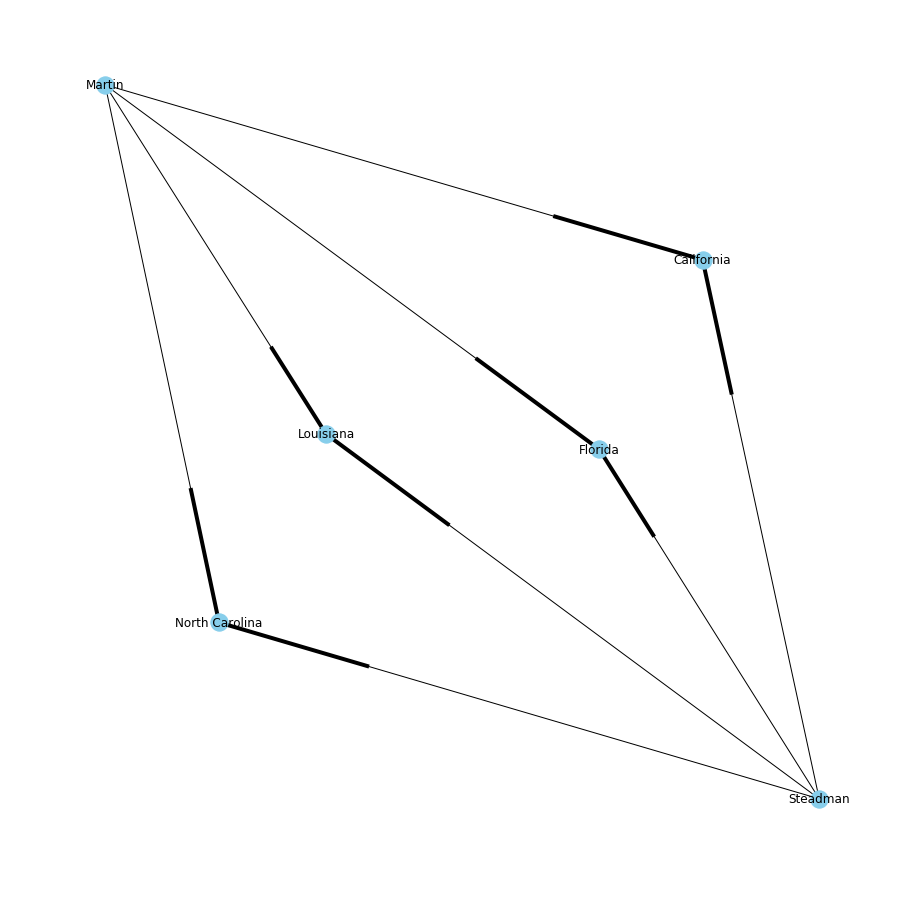

In [182]:
import networkx as nx
import matplotlib.pyplot as plt
A=['Martin', 'Steadman']
B=['California', 'Florida', 'Louisiana', 'North Carolina']
new_A=[]
new_B=[]
for i in A:
    for j in B:
        new_A.append(i)
        new_B.append(j)
        
kg_df = pd.DataFrame({'source':new_A, 'target':new_B})
# create a directed-graph from a dataframe
G=nx.from_pandas_dataframe(kg_df, "source", "target", 
                          edge_attr=False, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Appliquant ceci à un article de notre choix

In [295]:
## ENTRER LE NUMERO DE L'ARTICLE QUE VOUS VOULEZ VISUALISEZ
Num_article_a_visualiser=0
article = nlp(data.texts[Num_article_a_visualiser])
sentences = [x for x in article.sents]


source=[]
target=[]
for sent in sentences:
############################
    clean_unicode = {
        "'": "",
        "-":" ",
        "\[ | \]":" ",
        ":":" ",
        ",":" ",
        "。" :" ",
        "、":" ",
        "；":" ",
        "（":" ",
        "）":" ",
        "<":" ",
        "《":" ",
        "》":" ",
        "LEAD":"" ,
        "A12:4.":"",
        "U.S.":"United States",
        "US":"United States",
        "U.S. States":"United States",
        "the":"",
        "New York's": "New York State"

    }
    ## we clean our sentences for a better extraction
    #CORPUS OF THE ARTICLE
    for c in clean_unicode:
        sent = re.sub(c, clean_unicode[c], str(sent))

##########################"
    
    article_sent = nlp(str(sent))
    places = [x for x in article_sent.ents if x.label_=='GPE']
    people = [x for x in article_sent.ents if x.label_=='PERSON']
    
    if len(people)>1:
        used = []
        for x in sorted(people):
            if str(x) not in used: #enlever les elements dupliqués de people
                used.append(str(x))


        people=used
    #### List of people still in progress reducing names based on similarity of words 
        p=people
      #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
 #       print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
     #               print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_people=final_entity
    else:
        if len(people)==1:
            final_entity_people=people # if len(final_entity_people)>0 else 0)


##################### Places :  
    ###################
    if len(places)>1:
        used1 = []
        for x in sorted(places):
            if str(x) not in used1:
                used1.append(str(x))#enlever les elm dupliqué


        places=used1
        p=places
        #print("article ",k,"+","people avant traitement",p)
        vectorizer = CountVectorizer(ngram_range=(1, 2))     #enlever des lieux se basant sur la similarité
        vectorizer.fit(p)
        X_bag_of_words = vectorizer.transform(p)
        X_bag_of_words.shape
        vectorizer.get_feature_names()
        D = X_bag_of_words.toarray()

        ones_array = np.ones( (len(D), len(D)), dtype=np.float64 ) 

        for i in range(len(D)):
            for j in range(len(D)):
                ones_array[i][j]=(cosinus(D[i, :], D[j, :]))

        #print(ones_array)
        indexes=np.where(ones_array >0.4)
        #print("indexes",indexes)
        repeated=[]
        for i,j in zip(indexes[0],indexes[1]) :
            if (i!=j and len(p[i])>len(p[j])):
                repeated.append(p[j])    
    #    indexes=np.where(ones_array >0.4)
    #    print("indexes",indexes)
    #    used=[]
    #    repeated=[]
    #    for i,j in zip(indexes[0],indexes[1]) :
    #        if (i!=j and len(p[i])>len(p[j])):
    #            repeated.append(p[j])
                #print(repeated)            #print(used)
                #p.pop(i)
                #print(p[i],p[j])

    #    new_people=[x for x in sorted(p) if x not in repeated]
        new_people=[x for x in sorted(p) if x not in repeated]
  #      print("nouvelle liste",new_people)
        final_entity=[]
        used=[]
        used2=[]

        for i in (range(len(new_people))):
            for j in (range(len(new_people))):
    #            print("++++++++",i,"+",j)

                if i!=j and (sorted((new_people[i]).split(" "))==sorted((new_people[j]).split(" "))) and i not in used:
                    #print(new_people[i],"+",(new_people[j]),"les memes!")
                    #new_people.remove(new_people[i])
                    used.append(i)
                    used.append(j)
                    final_entity.append(new_people[i])  
    #                print(final_entity,"en progres")
        for i in (range(len(new_people))):             
            if i not in used:
    #            print(new_people[i])
                final_entity.append(new_people[i])
    #            print(final_entity,"en progres")
        final_entity_places=final_entity
    else:
        if len(places)==1:
            final_entity_places=places #if len(final_entity_places)>0 else 0)
        
        
#
    
    if(len(final_entity_people)>=1 and len(final_entity_places)>=1):

        for i in final_entity_people:
            for j in final_entity_places:
                #print("type",type(i),"++",type(j))
                if (str(i),str(j)) in zip(source,target):#toute les combinaisons sur les personnes et les lieux dans la mm phrase
                    print(i,"+",j,"Already in")
                else:
                    source.append(str(i))
                    target.append(str(j))
                    print(i,j)
        




Martin Steadman California
Martin Steadman Florida
Martin Steadman Louisiana
Martin Steadman North Carolina
Cuomo California
Cuomo Florida
Cuomo Louisiana
Cuomo North Carolina
Cuomo + California Already in
Cuomo + Florida Already in
Cuomo + Louisiana Already in
Cuomo + North Carolina Already in
Cuomo + California Already in
Cuomo + Florida Already in
Cuomo + Louisiana Already in
Cuomo + North Carolina Already in
Cuomo + California Already in
Cuomo + Florida Already in
Cuomo + Louisiana Already in
Cuomo + North Carolina Already in
Cuomo New York State
Sol Wachtler New York State
Cuomo + New York State Already in
Sol Wachtler + New York State Already in
Cuomo + New York State Already in
Sol Wachtler + New York State Already in
Cuomo + New York State Already in
Cuomo + New York State Already in
Cuomo + New York State Already in
Cuomo + New York State Already in
Stan Lundine New York State
Cuomo + New York State Already in
Stan Lundine + New York State Already in
Cuomo + New York State Alr

/home/toutou/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/toutou/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/toutou/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/toutou/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

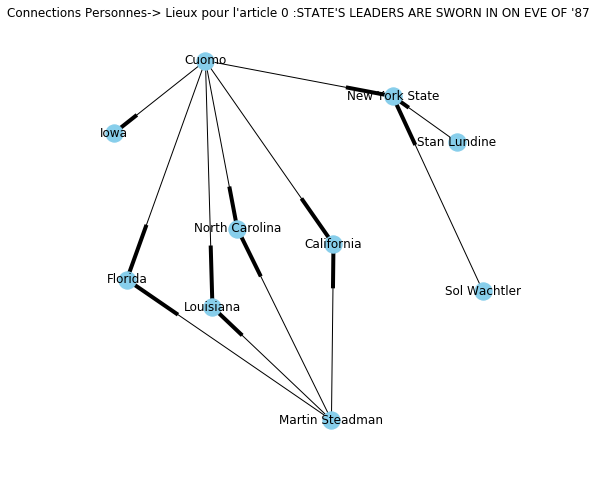

In [190]:

d1 = pd.DataFrame({'source':source, 'target':target})
# create a directed-graph from a dataframe
G=nx.from_pandas_dataframe(d1, "source", "target", 
                          edge_attr=False, create_using=nx.MultiDiGraph())
plt.figure(figsize=(8,8))
titre="Connections Personnes-> Lieux pour l'article "+str(Num_article_a_visualiser)+" :"+data.titles[Num_article_a_visualiser]
plt.title(titre)


pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

/home/toutou/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/toutou/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/toutou/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/toutou/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

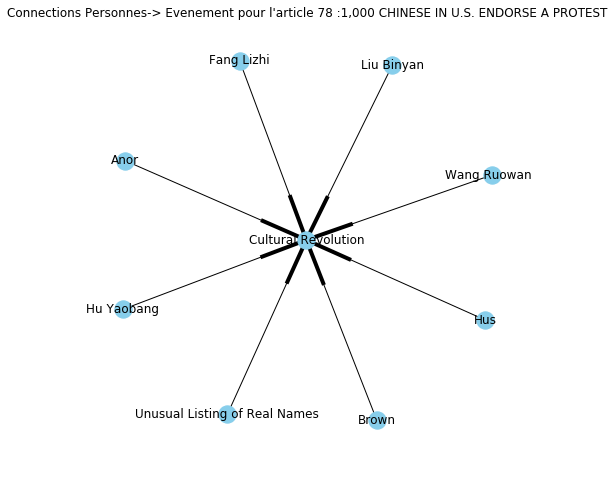

In [272]:
#Connection Personne->Event pour un article
num_article=78
source=[]
target=[]

import networkx as nx
import matplotlib.pyplot as plt
A=all_people[num_article]
B=all_events[num_article]
new_A=[]
new_B=[]
for i in A:
    for j in B:
        new_A.append(i)
        new_B.append(j)
        
kg_df = pd.DataFrame({'source':new_A, 'target':new_B})
# create a directed-graph from a dataframe
G=nx.from_pandas_dataframe(kg_df, "source", "target", 
                          edge_attr=False, create_using=nx.MultiDiGraph())
plt.figure(figsize=(8,8))
titre="Connections Personnes-> Evenement pour l'article "+str(num_article)+" :"+data.titles[num_article]
plt.title(titre)

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

## Création du nouvelle Dataset enrichie de méta informations

In [260]:
    df = pd.DataFrame({'Texts': data.texts[0:1000],
                       'Titles': data.titles[0:1000],
                       'Dates':data.dates[0:1000],
                       'Week':data.week[0:1000],
                       'Years':all_years,                       
                       'People':all_people,
                       'Places':all_places,
                       'Events':all_events,
                       'Principal_classifier':data.principal_classifier[0:1000],
                       'Scnd_classifier':data.second_classifier[0:1000],
                       'Third_classifier':data.third_classifier[0:1000]})


In [261]:
df.to_csv("/home/toutou/nyt.csv/nyt5.csv",sep='\t')


In [1]:
import pandas as pd

data2=pd.read_csv("/home/toutou/nyt.csv/nyt5.csv",sep='\t') ## Data enrichie
data3=pd.read_csv("/home/toutou/nyt.csv/nyt.csv",sep='\t') 
data3.head()

,dates,texts,titles,principal_classifier,second_classifier,third_classifier,week
0,1987-01-01,"LEAD: Governor Cuomo, with a possible Preside...",STATE'S LEADERS ARE SWORN IN ON EVE OF '87,politics and government,LIEUTENANT GOVERNORS (US),GOVERNORS (US),1987001
1,1987-01-02,LEAD: Fifty-eight days after winning re-elect...,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS,politics and government,INAUGURATIONS,GOVERNORS (US),1987001
2,1987-01-02,LEAD: Coming the day after Governor Cuomo ann...,ALBANY PAGEANT: POMP AND POLITICS,politics and government,INAUGURATIONS,Top/News/U.S./U.S. States,1987001
3,1987-01-02,"LEAD: For the first time in two years, New Yo...",LUNDINE OPTIMISTIC ABOUT NEW ROLE,politics and government,LIEUTENANT GOVERNORS (US),INAUGURATIONS,1987001
4,1987-01-02,LEAD: To the Editor: LEAD: To the Editor: To ...,Let's Scrap That Indefensible Board of Estimate,politics and government,Letter,Top/Opinion/Opinion/Letters,1987001


# Extraction de Thématique majoritaire

In [20]:
%matplotlib inline


from gensim.utils import simple_preprocess
import pandas
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models import  Word2Vec
import gensim
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm 
df=data3
var_texte = 'titles'
doc_set = df[var_texte].tolist()

# fonction qui génère les listes de mots (token) à partir des textes
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# on construit le corpus
data_words = list(sent_to_words(doc_set))
ndocs = len(data_words)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# on retire les mots-outils
data_words_nostops = remove_stopwords(data_words)
# création du dictionnaire
dico = corpora.Dictionary(data_words_nostops)

# ce qui permet par ex. de filtrer le vocabulaire
dico.filter_extremes(no_below=10)

# Create Corpus
texts = data_words_nostops

# matrice Term Document Frequency
corpus = [dico.doc2bow(text) for text in texts]
ntopics = 20
from gensim.models.ldamodel import LdaModel

generate_lda = True

# generate LDA model
import logging

if generate_lda:
    print("generate new LDA model")
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    ldamodel = LdaModel(corpus, num_topics=ntopics, id2word = dico,
                                           passes=2, random_state=100, per_word_topics=True)
    print(ldamodel)


    
ldamodel.show_topics(num_topics=ntopics,formatted=False)    

2020-01-06 19:10:37,171 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-01-06 19:10:37,291 : INFO : built Dictionary(7525 unique tokens: ['eve', 'leaders', 'state', 'sworn', 'accomplishments']...) from 7146 documents (total 38251 corpus positions)
2020-01-06 19:10:37,303 : INFO : discarding 6715 tokens: [('accomplishments', 1), ('inaugual', 1), ('sums', 2), ('pageant', 1), ('pomp', 6), ('lundine', 4), ('optimistic', 2), ('indefensible', 1), ('scrap', 2), ('lieu', 1)]...
2020-01-06 19:10:37,304 : INFO : keeping 810 tokens which were in no less than 10 and no more than 3573 (=50.0%) documents
2020-01-06 19:10:37,310 : INFO : resulting dictionary: Dictionary(810 unique tokens: ['eve', 'leaders', 'state', 'sworn', 'cuomo']...)
2020-01-06 19:10:37,394 : INFO : using symmetric alpha at 0.05
2020-01-06 19:10:37,396 : INFO : using symmetric eta at 0.05
2020-01-06 19:10:37,397 : INFO : using serial LDA version on this node
2020-01-06 19:10:37,401 : INFO : running online (mul

generate new LDA model


2020-01-06 19:10:38,062 : INFO : merging changes from 2000 documents into a model of 7146 documents
2020-01-06 19:10:38,065 : INFO : topic #0 (0.050): 0.022*"chief" + 0.022*"soviet" + 0.022*"new" + 0.019*"party" + 0.019*"bribery" + 0.016*"scandal" + 0.016*"reports" + 0.012*"old" + 0.012*"call" + 0.012*"inquiry"
2020-01-06 19:10:38,066 : INFO : topic #4 (0.050): 0.035*"vote" + 0.022*"soviet" + 0.022*"says" + 0.019*"south" + 0.019*"new" + 0.016*"chief" + 0.016*"president" + 0.016*"korea" + 0.013*"unrest" + 0.013*"city"
2020-01-06 19:10:38,068 : INFO : topic #11 (0.050): 0.024*"ethics" + 0.022*"rule" + 0.022*"leader" + 0.018*"ex" + 0.018*"koch" + 0.018*"new" + 0.015*"president" + 0.015*"panel" + 0.015*"albany" + 0.015*"says"
2020-01-06 19:10:38,069 : INFO : topic #10 (0.050): 0.038*"new" + 0.024*"election" + 0.019*"legislature" + 0.019*"cuomo" + 0.016*"opposition" + 0.014*"panama" + 0.014*"resigns" + 0.014*"aide" + 0.014*"leader" + 0.014*"albany"
2020-01-06 19:10:38,070 : INFO : topic #7 

2020-01-06 19:10:40,869 : INFO : topic #14 (0.050): 0.106*"party" + 0.094*"south" + 0.072*"africa" + 0.053*"democracy" + 0.050*"leader" + 0.028*"union" + 0.026*"ruling" + 0.024*"hard" + 0.021*"poland" + 0.016*"black"
2020-01-06 19:10:40,870 : INFO : topic #18 (0.050): 0.107*"political" + 0.055*"world" + 0.049*"back" + 0.037*"cuomo" + 0.032*"talk" + 0.028*"governor" + 0.027*"mexico" + 0.027*"finds" + 0.025*"time" + 0.025*"war"
2020-01-06 19:10:40,871 : INFO : topic #17 (0.050): 0.126*"mayor" + 0.045*"may" + 0.043*"corrections" + 0.039*"miller" + 0.038*"inquiry" + 0.033*"face" + 0.030*"myerson" + 0.029*"kremlin" + 0.024*"canada" + 0.023*"king"
2020-01-06 19:10:40,872 : INFO : topic #16 (0.050): 0.070*"plan" + 0.049*"still" + 0.043*"haiti" + 0.036*"end" + 0.033*"gorbachev" + 0.029*"return" + 0.026*"urges" + 0.023*"zaire" + 0.022*"agree" + 0.022*"unity"
2020-01-06 19:10:40,873 : INFO : topic #13 (0.050): 0.041*"mandela" + 0.035*"police" + 0.028*"race" + 0.027*"control" + 0.026*"protests" +

LdaModel(num_terms=810, num_topics=20, decay=0.5, chunksize=2000)


[(0,
  [('journal', 0.16883183),
   ('old', 0.070420906),
   ('scandal', 0.06926323),
   ('egypt', 0.04119474),
   ('parliament', 0.035332814),
   ('ousted', 0.027498553),
   ('call', 0.027215814),
   ('charges', 0.025569985),
   ('chief', 0.025246292),
   ('go', 0.019610567)]),
 (1,
  [('new', 0.29714116),
   ('york', 0.070393875),
   ('government', 0.06262656),
   ('council', 0.04591487),
   ('city', 0.0412291),
   ('first', 0.028147852),
   ('way', 0.026421323),
   ('chief', 0.020909945),
   ('german', 0.018185966),
   ('year', 0.017084025)]),
 (2,
  [('change', 0.076674856),
   ('moscow', 0.06786106),
   ('india', 0.06345137),
   ('tough', 0.047458295),
   ('speaker', 0.044993784),
   ('yugoslavia', 0.040242977),
   ('new', 0.03466356),
   ('parking', 0.03271542),
   ('people', 0.031591736),
   ('notebook', 0.022607718)]),
 (3,
  [('power', 0.103670746),
   ('italy', 0.08288467),
   ('communists', 0.050758142),
   ('two', 0.03550178),
   ('sees', 0.033561576),
   ('fear', 0.0329935

In [23]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, gensim.matutils.corpus2csc(corpus), dictionary=ldamodel.id2word)
#vis
pyLDAvis.display(vis)

In [27]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    i=0
    for i, row in enumerate(ldamodel[corpus]):
        #print(row[0])            
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        #print(row)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_set)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df = pd.DataFrame({'Texts': data2.Texts,
                   'Titles': data2.Titles,
                   'Dates':data2.Dates,
                   'Week':data2.Week,
                   'Years':data2.Years,                       
                   'People':data2.People,
                   'Places':data2.Places,
                   'Events':data2.Events,
                   'Principal_classifier':data2.Principal_classifier,
                   'Scnd_classifier':data2.Scnd_classifier,
                   'Third_classifier':data2.Third_classifier,
                   'Topic_D':df_dominant_topic.Dominant_Topic[0:1000],
                   'Topic_keywords':df_dominant_topic.Keywords[0:1000]})


# Show
df.head(10)

,Dates,Events,People,Places,Principal_classifier,Scnd_classifier,Texts,Third_classifier,Titles,Topic_D,Topic_keywords,Week,Years
0,1987-01-01,['New Years Eve'],"['Cuomo', 'Martin Steadman', 'Sol Wachtler', '...","['California', 'Florida', 'Iowa', 'Louisiana',...",politics and government,LIEUTENANT GOVERNORS (US),"LEAD: Governor Cuomo, with a possible Preside...",GOVERNORS (US),STATE'S LEADERS ARE SWORN IN ON EVE OF '87,13.0,"mandela, police, death, get, russians, haiti, ...",1987001,1987
1,1987-01-02,['SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHM...,"['A Song', 'ACCOMPLISHMENTS', 'Andrew P.', 'Be...","['Albany', 'Lieut', 'New York State', 'P.M.', ...",politics and government,INAUGURATIONS,LEAD: Fifty-eight days after winning re-elect...,GOVERNORS (US),SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS,10.0,"election, home, violence, haitian, years, face...",1987001,1988
2,1987-01-02,[New Years Eve],"['Alfonse M. DAmato', 'Alfred Del Bello', 'Cuo...","['Albany', 'California', 'Florida', 'Jamaica',...",politics and government,INAUGURATIONS,LEAD: Coming the day after Governor Cuomo ann...,Top/News/U.S./U.S. States,ALBANY PAGEANT: POMP AND POLITICS,8.0,"politics, city, hall, right, fight, wins, news...",1987001,1987
3,1987-01-02,['LUNDINE OPTIMISTIC ABOUT NEW ROLE in 1988'],"['Alfred B. Del Bello', 'Carter', 'Cuomo', 'Cu...","['Albany', 'Jamestown', 'Long Island', 'Loudon...",politics and government,LIEUTENANT GOVERNORS (US),"LEAD: For the first time in two years, New Yo...",INAUGURATIONS,LUNDINE OPTIMISTIC ABOUT NEW ROLE,1.0,"new, york, government, council, city, first, w...",1987001,1988
4,1987-01-02,"[""Let's Scrap That Indefensible Board of Estim...","['Costikyan', 'Costikyans Manhattan', 'Edward ...","['Bronx', 'Brooklyn', 'Manhattan', 'New York']",politics and government,Letter,LEAD: To the Editor: LEAD: To the Editor: To ...,Top/Opinion/Opinion/Letters,Let's Scrap That Indefensible Board of Estimate,19.0,"soviet, army, russian, board, times, look, tha...",1987001,1987
5,1987-01-02,['In Lieu of the Lulu in 1986'],['Cuomo'],['Assemblymen'],politics and government,EDITORIALS,"LEAD: Officially, New York State Senators and...",LEGISLATURES,In Lieu of the Lulu,0.0,"journal, old, scandal, egypt, parliament, oust...",1987001,1986
6,1987-01-02,"[""LEADERS AREN'T NAMED in 1987""]","['Doan Khue', 'Duc Anh', 'Le Duc Tho', 'Mai Ch...","['Bangkok', 'Cambodia', 'Hanoi', 'Vietnam']",politics and government,Top/News,LEAD: A six-day session of Vietnam's National...,Top/News/World/Countries and Territories/Vietnam,LEADERS AREN'T NAMED,6.0,"albany, panel, big, ethics, last, named, dissi...",1987001,1987
7,1987-01-02,"[""TRANSCRIPT OF CUOMO'S INAUGURAL ADDRESS FOR ...","['Bob', 'Cuomos', 'Franklin Roosevelt', 'John ...","['Albany', 'America', 'Manhattan', 'New York S...",politics and government,GOVERNORS (US),LEAD: Following is a transcript of Governor C...,INAUGURATIONS,TRANSCRIPT OF CUOMO'S INAUGURAL ADDRESS FOR HI...,10.0,"election, home, violence, haitian, years, face...",1987001,1983
8,1987-01-02,"['NEW YEAR', 'New Years']","['Gunter Verheugen', 'Helmut Kohl', 'Kohls', '...",0,politics and government,NEW YEAR,LEAD: West German television executives were ...,TELEVISION,"KOHL'S WRONG TAPE, AND THE CABBAGE PUN",1.0,"new, york, government, council, city, first, w...",1987001,1987
9,1987-01-03,[New Years],"['Chen Yun', 'Deng Xiaoping countrys', 'Hu',...","['Beijing', 'China', 'Chinas']",politics and government,DEMONSTRATIONS AND RIOTS,LEAD: The increasing harshness of official cr...,ECONOMIC CONDITIONS AND TRENDS,BEHIND CHINA'S PROTESTS,9.0,"china, gorbachev, congress, hope, general, tal...",1987001,1979


In [28]:
df.to_csv("/home/toutou/nyt.csv/nyt6.csv",sep='\t')


## Moteur de Recherche

In [273]:
query='Alfred Del Bello'
q = CountVectorizer(ngram_range=(1, 2))
q.fit([query])
query_comb= q.get_feature_names()

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts = data2.Texts
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(texts)
X_texts = tfidf_vectorizer.transform(texts)
ngram_comb_texts= tfidf_vectorizer.get_feature_names()
D_texts = X_texts.toarray()
n_docs, n_terms_texts = D_texts.shape
n_terms_texts,n_docs


(273153, 1000)

In [275]:
titles = data2.Titles
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(titles)
X_titles = tfidf_vectorizer.transform(titles)
ngram_comb_titles= tfidf_vectorizer.get_feature_names()
D_titles = X_titles.toarray()
n_docs, n_terms_titles = D_titles.shape
n_terms_titles,n_docs


(7292, 1000)

In [276]:
People = data2.People
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(People)
X_People = tfidf_vectorizer.transform(People)
ngram_comb_People= tfidf_vectorizer.get_feature_names()
D_People = X_People.toarray()
n_docs, n_terms_People = D_People.shape
n_terms_People,n_docs


(13112, 1000)

In [277]:
Places = data2.Places
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(Places)
X_Places = tfidf_vectorizer.transform(Places)
ngram_comb_Places= tfidf_vectorizer.get_feature_names()
D_Places = X_Places.toarray()
n_docs, n_terms_Places = D_Places.shape
n_terms_Places,n_docs


(3217, 1000)

In [278]:
Events = data2.Events
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(Events)
X_Events = tfidf_vectorizer.transform(Events)
ngram_comb_Events= tfidf_vectorizer.get_feature_names()
D_Events = X_Events.toarray()
n_docs, n_terms_Events = D_Events.shape
n_terms_Events,n_docs


(7538, 1000)

Les Indexes qui reresentes la requette query par rapport à chaque Meta Information et par rapport au corp de l'article

In [279]:
indexes_texts = [ngram_comb_texts.index(q) for q in query_comb if q in ngram_comb_texts]
indexes_titles = [ngram_comb_titles.index(q) for q in query_comb if q in ngram_comb_titles]
indexes_people = [ngram_comb_People.index(q) for q in query_comb if q in ngram_comb_People]
indexes_places = [ngram_comb_Places.index(q) for q in query_comb if q in ngram_comb_Places]
indexes_events = [ngram_comb_Events.index(q) for q in query_comb if q in ngram_comb_Events]



In [280]:
query_vec_text = np.zeros(n_terms_texts)
query_vec_text[indexes_texts] = 1

query_vec_title = np.zeros(n_terms_titles)
query_vec_title[indexes_titles] = 1

query_vec_people = np.zeros(n_terms_People)
query_vec_people[indexes_people] = 1

query_vec_places = np.zeros(n_terms_Places)
query_vec_places[indexes_places] = 1

query_vec_events = np.zeros(n_terms_Events)
query_vec_events[indexes_events] = 1



In [281]:
cosinus(D_texts[3, :], query_vec_text),cosinus(D_titles[3, :], query_vec_title),cosinus(D_People[3, :], query_vec_people),cosinus(D_Places[3, :], query_vec_places),cosinus(D_Events[3, :], query_vec_events)

(0.07004403239085709, 0, 0.40362391745325804, 0.0, 0)

 Vu que les indexes Resume mieux l'information et que l'utilisateur cherchera en utilisant une requette syntetique on donnera un score plus élevé aux indexes titre, person, lieux et evenement égale à 2 
 et un poid de 1 aux score pour celui du text

In [282]:
def search(query, data2,n_gram):
    q = CountVectorizer(ngram_range=n_gram)
    q.fit([query])
    query_comb= q.get_feature_names()    
    
    texts = data2.Texts
    tfidf_vectorizer = TfidfVectorizer(ngram_range=n_gram)
    tfidf_vectorizer.fit(texts)
    X_texts = tfidf_vectorizer.transform(texts)
    ngram_comb_texts= tfidf_vectorizer.get_feature_names()
    D_texts = X_texts.toarray()
    n_docs, n_terms_texts = D_texts.shape

    titles = data2.Titles
    tfidf_vectorizer = TfidfVectorizer(ngram_range=n_gram)
    tfidf_vectorizer.fit(titles)
    X_titles = tfidf_vectorizer.transform(titles)
    ngram_comb_titles= tfidf_vectorizer.get_feature_names()
    D_titles = X_titles.toarray()
    n_docs, n_terms_titles = D_titles.shape

    Places = data2.Places
    tfidf_vectorizer = TfidfVectorizer(ngram_range=n_gram)
    tfidf_vectorizer.fit(Places)
    X_Places = tfidf_vectorizer.transform(Places)
    ngram_comb_Places= tfidf_vectorizer.get_feature_names()
    D_Places = X_Places.toarray()
    n_docs, n_terms_Places = D_Places.shape

    Events = data2.Events
    tfidf_vectorizer = TfidfVectorizer(ngram_range=n_gramd)
    tfidf_vectorizer.fit(Events)
    X_Events = tfidf_vectorizer.transform(Events)
    ngram_comb_Events= tfidf_vectorizer.get_feature_names()
    D_Events = X_Events.toarray()
    n_docs, n_terms_Events = D_Events.shape    
    
    indexes_texts = [ngram_comb_texts.index(q) for q in query_comb if q in ngram_comb_texts]
    indexes_titles = [ngram_comb_titles.index(q) for q in query_comb if q in ngram_comb_titles]
    indexes_people = [ngram_comb_People.index(q) for q in query_comb if q in ngram_comb_People]
    indexes_places = [ngram_comb_Places.index(q) for q in query_comb if q in ngram_comb_Places]
    indexes_events = [ngram_comb_Events.index(q) for q in query_comb if q in ngram_comb_Events]

    
    query_vec_text = np.zeros(n_terms_texts)
    query_vec_text[indexes_texts] = 1

    query_vec_title = np.zeros(n_terms_titles)
    query_vec_title[indexes_titles] = 1

    query_vec_people = np.zeros(n_terms_People)
    query_vec_people[indexes_people] = 1

    query_vec_places = np.zeros(n_terms_Places)
    query_vec_places[indexes_places] = 1

    query_vec_events = np.zeros(n_terms_Events)
    query_vec_events[indexes_events] = 1    
    cc = {i: cosinus(D[i, :], q) for i in range(n_docs)}
    cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)
    return cc

In [283]:
cosinus(D_texts[2, :], query_vec_text)+2*cosinus(D_titles[2, :], query_vec_title)+2*cosinus(D_People[2, :], query_vec_people)+2*cosinus(D_Places[2, :], query_vec_places)+2*cosinus(D_Events[2, :], query_vec_events)

0.5660677041007319

In [284]:
cc = {i: cosinus(D_texts[i, :], query_vec_text)+2*cosinus(D_titles[i, :], query_vec_title)+2*cosinus(D_People[i, :], query_vec_people)+2*cosinus(D_Places[i, :], query_vec_places)+2*cosinus(D_Events[i, :], query_vec_events) for i in range(n_docs)}
cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)

In [285]:
#cc=search(query, data2,(1,2))
cc[0:10]

[(3, 0.8772918672973732),
 (2, 0.5660677041007319),
 (546, 0.5649986438093976),
 (147, 0.4060937018094574),
 (925, 0.30946336941001884),
 (870, 0.19799834519409304),
 (249, 0.16197998603223956),
 (173, 0.13740842845675796),
 (523, 0.13207601910312472),
 (324, 0.11586059421997127)]

In [288]:
nb_top_docs = 10
top_docs = [r for (r,v) in cc[0:nb_top_docs]]
print("Les Meuilleurs",str(nb_top_docs)," Resultats Corespandant à la requette ",'"',query,'"',":")
for i, td in zip(range(nb_top_docs), top_docs):
    #print(top_feats_in_doc(X_hp, features_hp, td))
    print("%s (%s): %s" % (i+1, td, titles[td]))



Les Meuilleurs 10  Resultats Corespandant à la requette  " Alfred Del Bello " :
1 (3): LUNDINE OPTIMISTIC ABOUT NEW ROLE
2 (2): ALBANY PAGEANT: POMP AND POLITICS
3 (546): FOR FILIPINO GUNMAKER, ELECTION BOLSTERS BUSINESS
4 (147): AQUINO SAID TO WIN IN KEY PLEBISCITE ON A CONSTITUTION
5 (925): CASTRO WARNS AGAINST TRAITORS
6 (870): Mexico Succession: A Diviner's Sport
7 (249): Mexico's Governing Party Backs Status Quo
8 (173): SIMON, AMID AN INQUIRY, REVIEWS PENSION RIGHTS
9 (523): CENTER FOR ELDERLY PROVIDES JOBS FOR STAVISKY ALLIES
10 (324): INVOKING HARRIMAN, WESTCHESTER DEMOCRATS FORM A GROUP


In [290]:
nb_top_docs = 10
top_docs = [r for (r,v) in cc[0:nb_top_docs]]
print("Les Personnes Corespandant à chaque article par rapport à la requette ",'"',query,'"',":")

for i, td in zip(range(nb_top_docs), top_docs):
    #print(top_feats_in_doc(X_hp, features_hp, td))
    print("%s (%s): %s" % (i+1, td, People[td]))


Les Personnes Corespandant à chaque article par rapport à la requette  " Alfred Del Bello " :
1 (3): ['Alfred B. Del Bello', 'Carter', 'Cuomo', 'Cuomos', 'Fritz W. Alexander', 'Hugh L. Carey', 'Lundines', 'Sara', 'Stan Lundine', 'Thomas J. Downey']
2 (2): ['Alfonse M. DAmato', 'Alfred Del Bello', 'Cuomo', 'Daniel Patrick Moynihan', 'Ed Koch', 'Garen Gdanian', 'Hugh L. Carey', 'Larry Stone', 'Mark Lundine', 'Michael McCartin', 'Neil Diamond', 'Queens', 'Ruth Lundine', 'Saul', 'Stan', 'Sylvia Weprin', 'Teleprompter', 'Thee', 'Tonio Burgos', 'Warren M. Anderson']
3 (546): ['Barrigas', 'Benjamin Barriga', 'Duterte', 'Fidel V. Ramos', 'Rafael Ileto', 'Salvador H. Laurel', 'Woodrow Estrera']
4 (147): ['Aquinos', 'Corazon C. Aquino', 'Enrile', 'Ferdinand E. Marcos', 'Jejomar Binay', 'Juan Ponce', 'Luzon', 'Makati', 'Marcoss', 'Namfrel', 'Ramon Felipe', 'Teodoro Benigno']
5 (925): ['Fidel Castro', 'Rafael del Pino']
6 (870): ['A Popular', 'Alfredo del', 'Carlos Salinas de Gortari', 'Fernando V